<a href="https://colab.research.google.com/github/pmccthy/ML-playground/blob/main/RNNs/simple_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Vanilla RNN models**

**Model 1**

First simple RNN model based on the excellent tutorial at https://amitness.com/2020/04/recurrent-layers-keras/, which is a good starting point for understanding the general architecture and information flow of RNNs

In [53]:
%matplotlib inline
import tensorflow as tf
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
import numpy as np
import matplotlib.pyplot as plt

* Input will be a sequence of length 3 with 2 features

* Output of RNN cells/ hidden states will be length 4

* The `return_sequences` argument is set to `False` because we only want the output of the last cell/ the last hidden state rather than the hidden states at each stage

* If `return_sequences` was set to `True`, we would end up with an output of size 4 for each cell (each of which processes 1 sample of the input), so we would have output dimensions (3,4)


In [54]:
model = Sequential()
model.add(SimpleRNN(units=4, input_shape=(3, 2), return_sequences=False))

In [55]:
# add a dense layer of size 1 so we have a single value for the output
model.add(Dense(1))

In [56]:
# create 100 samples of input data and pass it through the model 
# (at this point the model is not trained so the output will be meaningless, 
# but looking at the output dimensions is helpful)
x = np.random.random([100,3,2])
y = model(x)
y.shape

TensorShape([100, 1])

as expected, there is an output of size 1 for each input data point

**Model 2**

Time to build a model that actually does something useful. This is based on the tutorial at https://www.datatechnotes.com/2018/12/rnn-example-with-keras-simplernn-in.html

In [109]:
# create some sample data
fs = 100   
f = 1     
T = 10      
N = fs * T  
t = np.arange(0, N) / fs        
x = np.sin(2 * np.pi * f * t) + np.random.random(N) / 2

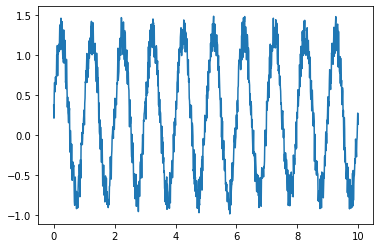

In [110]:
plt.plot(t,x)

In [111]:
# split dataset into train and test
split = 0.8
train_idx = np.arange(1,int(split*N))
test_idx = np.arange(int(split*N),N)
train, test = x[train_idx], x[test_idx]

In [112]:
# define step (number of samples used to predict next sample)
step = 4

In [113]:
# function to convert data to train and test matrices given step size
def convert_to_matrix(data, step):
 X, Y =[], []
 for i in range(len(data)-step):
  d = i + step  
  X.append(data[i:d])
  Y.append(data[d])
 return np.array(X), np.array(Y)

In [114]:
# convert data
X_train, Y_train = convert_to_matrix(train, step)
X_test, Y_test = convert_to_matrix(test, step)

In [115]:
# reshape data to make compatible with keras as
# keras expects matrix: (num_samples, num features, input length)
# the second dimension will be 1 as we only have 1 feature
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_train.shape
X_test.shape


(196, 1, 4)

In [116]:
# build simple RNN model
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 32)                1184      
                                                                 
 dense_3 (Dense)             (None, 8)                 264       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


In [119]:
# train model
model.fit(X_train, Y_train, epochs=100, batch_size=16, verbose=2)
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)
predicted = np.concatenate((predict_train, predict_test), axis=0)

Epoch 1/100
50/50 - 0s - loss: 0.0294 - 144ms/epoch - 3ms/step
Epoch 2/100
50/50 - 0s - loss: 0.0294 - 86ms/epoch - 2ms/step
Epoch 3/100
50/50 - 0s - loss: 0.0296 - 96ms/epoch - 2ms/step
Epoch 4/100
50/50 - 0s - loss: 0.0297 - 92ms/epoch - 2ms/step
Epoch 5/100
50/50 - 0s - loss: 0.0293 - 86ms/epoch - 2ms/step
Epoch 6/100
50/50 - 0s - loss: 0.0295 - 88ms/epoch - 2ms/step
Epoch 7/100
50/50 - 0s - loss: 0.0292 - 96ms/epoch - 2ms/step
Epoch 8/100
50/50 - 0s - loss: 0.0296 - 96ms/epoch - 2ms/step
Epoch 9/100
50/50 - 0s - loss: 0.0293 - 82ms/epoch - 2ms/step
Epoch 10/100
50/50 - 0s - loss: 0.0290 - 88ms/epoch - 2ms/step
Epoch 11/100
50/50 - 0s - loss: 0.0291 - 87ms/epoch - 2ms/step
Epoch 12/100
50/50 - 0s - loss: 0.0288 - 88ms/epoch - 2ms/step
Epoch 13/100
50/50 - 0s - loss: 0.0291 - 89ms/epoch - 2ms/step
Epoch 14/100
50/50 - 0s - loss: 0.0293 - 91ms/epoch - 2ms/step
Epoch 15/100
50/50 - 0s - loss: 0.0292 - 88ms/epoch - 2ms/step
Epoch 16/100
50/50 - 0s - loss: 0.0292 - 87ms/epoch - 2ms/step


In [95]:
# evaluate loss
score_train = model.evaluate(X_train, Y_train, verbose=0)

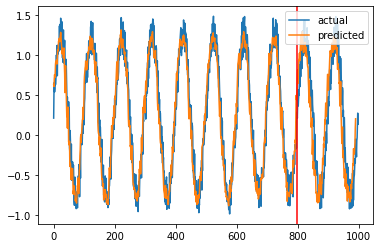

In [138]:
# visualise the results
plt.plot(np.concatenate((train, test), axis=0), label='actual')
plt.plot(predicted, label='predicted')
plt.axvline(train_idx[-1], c='r')
plt.legend()
